# Digital Image Processing<br> Problem 2<br> Felix Neutatz

##Combining spatial enhancement methods

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from functools import partial

In [5]:
def plotGreyImage(image, title):
    plt.imshow(image, cmap='Greys_r')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [6]:
def applyKernel(A, kernel, constant = 1):
    return np.sum(np.multiply(kernel, A) / constant)

In [7]:
def laplacian_3x3_filter(A):
    
    #convolution matrix
    Dxy = np.asmatrix([[ 0, -1,  0],
                       [-1,  4, -1],
                       [ 0, -1,  0]])
    
    return applyKernel(A, Dxy, constant = 1)

In [8]:
def sobel_3x3_filter(A):
    
    constant = 4
        
    #convolution matrix x
    Sx = np.asmatrix([[-1, 0, 1],
                      [-2, 0, 2],
                      [-1, 0, 1]])
    
    #convolution matrix y 
    Sy = np.asmatrix([[-1, -2, -1],
                      [ 0,  0,  0],
                      [ 1,  2,  1]])
    
    Gx = applyKernel(A, Sx, constant = constant)
    Gy = applyKernel(A, Sy, constant = constant)
    
    G = np.sqrt(np.power(Gx,2) + np.power(Gy,2))
    
    return G

In [9]:
def averaging_5x5_filter(A):
    average_filter = np.ones((5,5))
    constant = 25
    
    return applyKernel(A, average_filter, constant = constant)

In [10]:
def convolution(image, filter, filter_shape):
    newImage = np.zeros(image.shape)
    
    center = (filter_shape - 1) / 2
    
    #if a element of the window is outside of the border, fill it with zero = zero padding  
    #iterate through picture pixel by pixel
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            
            #compute current window A        
            A = np.zeros(filter_shape)
            for ax in range(filter_shape[0]):
                if (ax - center[0] + x >= 0 and ax - center[0] + x < image.shape[0]):
                    for ay in range(filter_shape[1]):
                        if (ay - center[1] + y >= 0 and ay - center[1] + y < image.shape[1]):
                            A[ax,ay] = image[ax - center[0] + x, ay - center[1] + y]
                            
            #apply filter to window of point at (x,y)
            newImage[x,y] = filter(A)
    
    return newImage

In [11]:
def power_law_transformation(image, gamma, c = 1):
    #TODO: generalize that also for images other than 8 bit pictures
    #numberBits = 8    
    #valueRange = 2**numberBits
    valueRange = np.max(image) + 1
    
    transformation = np.asarray((c * np.power(np.arange(np.min(image),valueRange, 1) / (valueRange-1), gamma))*(valueRange-1), dtype=int)
    
    #plot transformation function
    plt.plot(np.arange(valueRange), transformation, color = 'r')  
    plt.xlim((0,valueRange)) 
    plt.ylim((0,valueRange + 0.1 * valueRange)) 
    plt.xlabel("original pixel intensity")
    plt.ylabel("new pixel intensity")
    plt.title("transformation function")
    plt.show()
    
    return transformation[np.asarray(image, dtype=int)]   

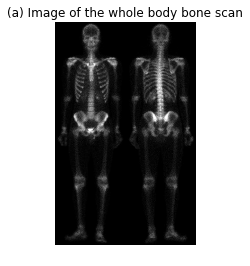

current value range: 0 - 255


In [12]:
imageName = 'skeleton_orig.tif'
a = mpimg.imread(imageName)

plotGreyImage(a, "(a) Image of the whole body bone scan")

print "current value range: " + str(np.min(a)) + " - " + str(np.max(a))


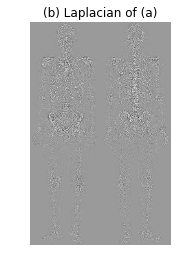

current value range: -87.0 - 82.0
value range of remapped matrix: 116.625 - 137.75


In [13]:
b = convolution(a, partial(laplacian_3x3_filter), np.asarray([3,3]))

plotGreyImage(b, "(b) Laplacian of (a)")

print "current value range: " + str(np.min(b)) + " - " + str(np.max(b))

OldMin = -4 * 255 # alternative np.min(b)
OldMax = 4 * 255  # alternative: np.max(b)
NewMin = 0
NewMax = 255

b_remapped = (((b - OldMin) * (NewMax - NewMin)) / (OldMax - OldMin)) + NewMin

print "value range of remapped matrix: " + str(np.min(b_remapped)) + " - " + str(np.max(b_remapped))

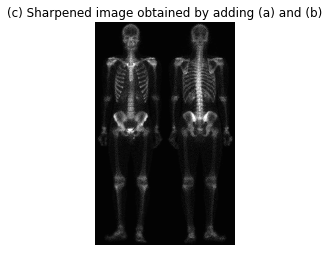

current value range: 123.875 - 391.125


In [12]:
c = a + b_remapped

plotGreyImage(c, "(c) Sharpened image obtained by adding (a) and (b)")

print "current value range: " + str(np.min(c)) + " - " + str(np.max(c))

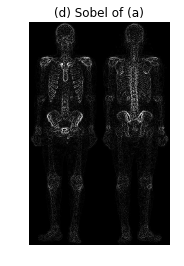

current value range: 0.0 - 114.796014739


In [13]:
d = convolution(a, partial(sobel_3x3_filter), np.asarray([3,3]))

plotGreyImage(d, "(d) Sobel of (a)")

print "current value range: " + str(np.min(d)) + " - " + str(np.max(d))

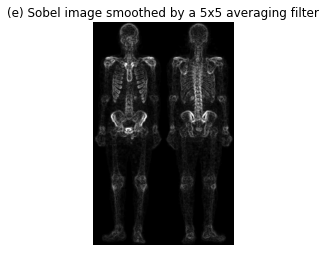

current value range: 0.0 - 73.1597259246


In [14]:
e = convolution(d, partial(averaging_5x5_filter), np.asarray([5,5]))

plotGreyImage(e, "(e) Sobel image smoothed by a 5x5 averaging filter")

print "current value range: " + str(np.min(e)) + " - " + str(np.max(e))

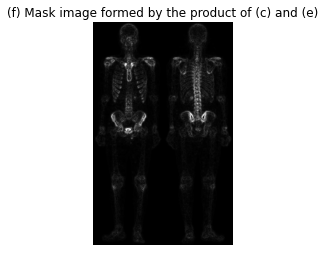

current value range: 0.0 - 25431.0359047


In [15]:
f = np.multiply(c, e)

plotGreyImage(f, "(f) Mask image formed by the product of (c) and (e)")

print "current value range: " + str(np.min(f)) + " - " + str(np.max(f))

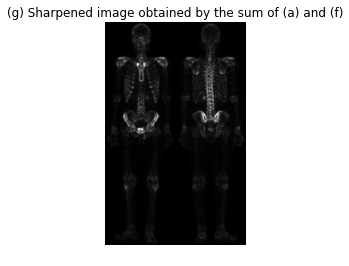

current value range: 0.0 - 25669.0359047


In [16]:
g = a + f

plotGreyImage(g, "(g) Sharpened image obtained by the sum of (a) and (f)")

print "current value range: " + str(np.min(g)) + " - " + str(np.max(g))

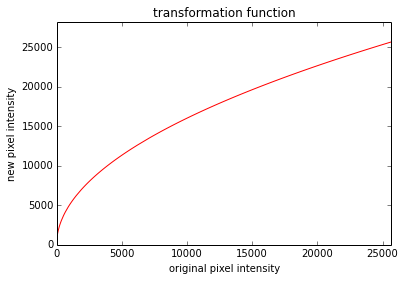

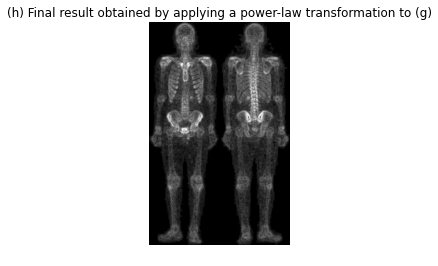

current value range: 0 - 25669


In [17]:
h = power_law_transformation(g, 0.5, c = 1)

plotGreyImage(h, "(h) Final result obtained by applying a power-law transformation to (g)")

print "current value range: " + str(np.min(h)) + " - " + str(np.max(h))

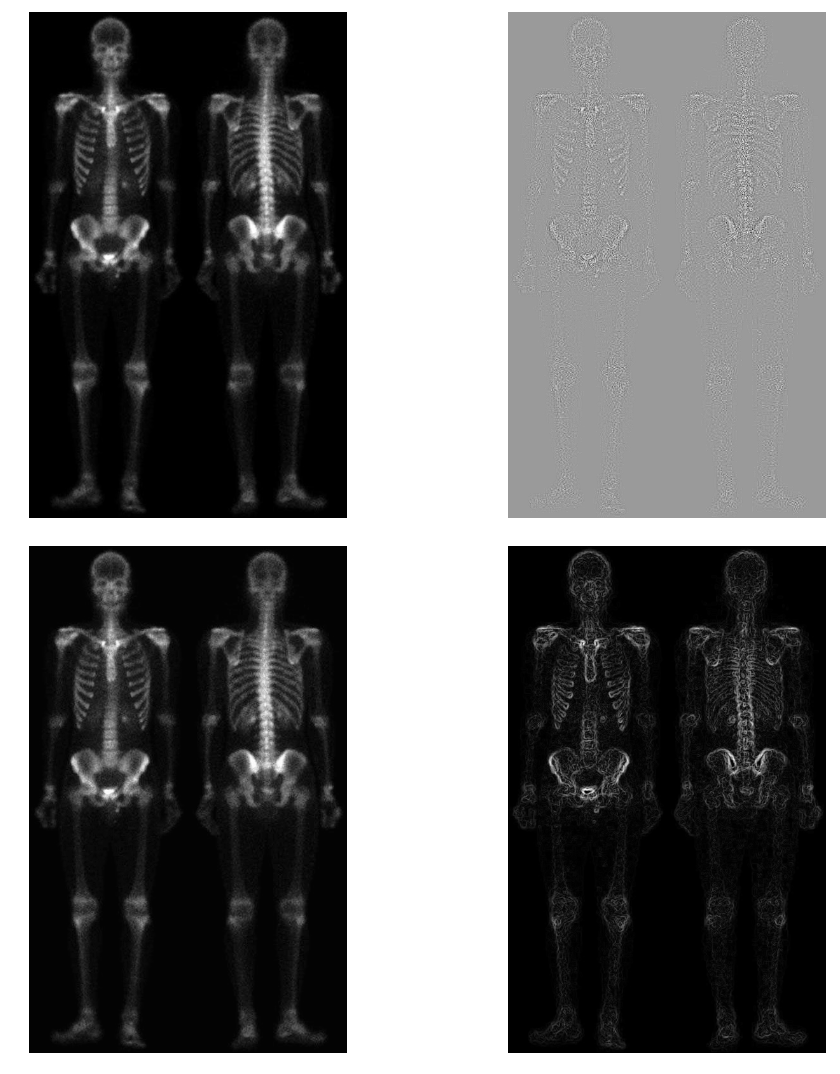

In [18]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

fig.set_figheight(15)
fig.set_figwidth(15)

ax1.imshow(a, cmap='Greys_r')
ax1.axis('off')

ax2.imshow(b, cmap='Greys_r')
ax2.axis('off')

ax3.imshow(c, cmap='Greys_r')
ax3.axis('off')

ax4.imshow(d, cmap='Greys_r')
ax4.axis('off')

plt.tight_layout()
plt.show()

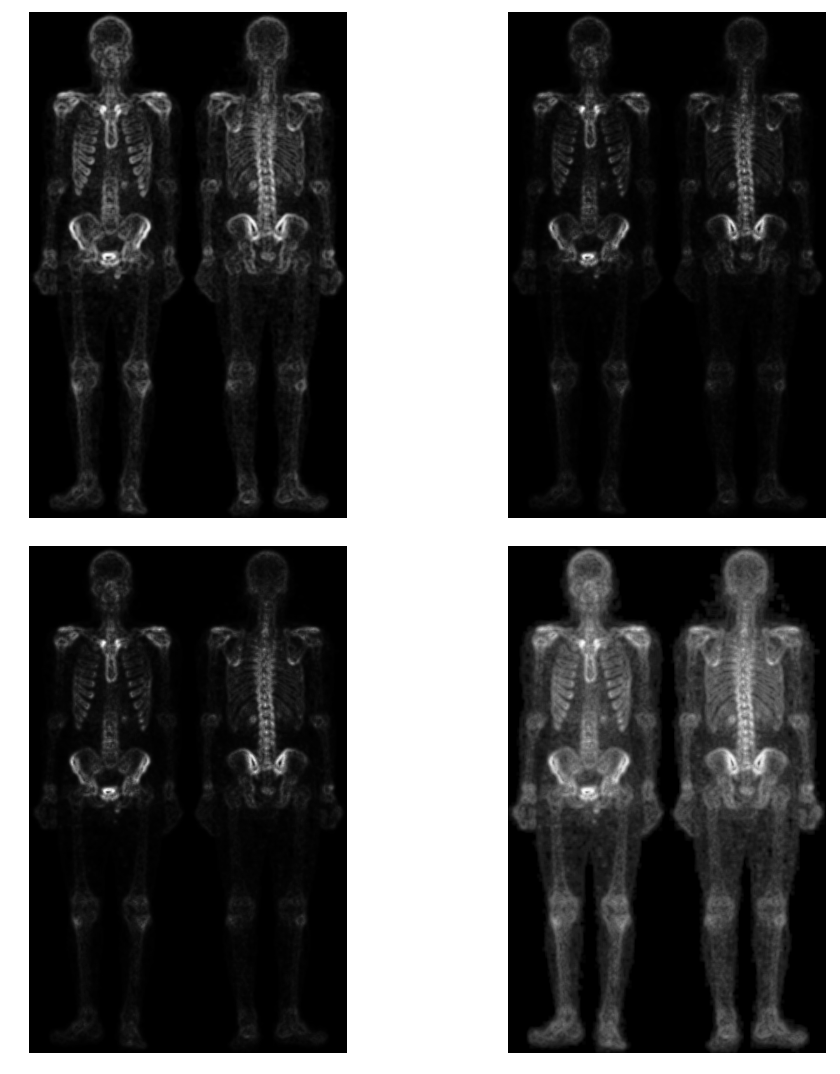

In [19]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

fig.set_figheight(15)
fig.set_figwidth(15)

ax1.imshow(e, cmap='Greys_r')
ax1.axis('off')

ax2.imshow(f, cmap='Greys_r')
ax2.axis('off')

ax3.imshow(g, cmap='Greys_r')
ax3.axis('off')

ax4.imshow(h, cmap='Greys_r')
ax4.axis('off')

plt.tight_layout()
plt.show()